In [4]:
import tensorflow as tf

x=tf.constant([1.5, 2.5, 3.0, 4.2, 5.0, 6.0])
y=tf.constant([1.2, 2.5, 3.0, 4.0, 5.5, 6.5])

print('Elements in array x')
with tf.name_scope ("ElementsOfArray_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output = sess.run(x[i])
            print(output)
    
print('Elements in array y')
with tf.name_scope ("ElementsOfArray_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output1 = sess.run(y[i])
            print(output1)

Elements in array x
1.5
2.5
3.0
4.2
5.0
6.0
Elements in array y
1.2
2.5
3.0
4.0
5.5
6.5


In [5]:
sum1=tf.constant(0)

with tf.name_scope("Mean_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output =sess.run(x[i])
            sum1=tf.add(sum1,output, name="AddX")
        a=tf.divide(sum1,len(sess.run(x)), name="DivideByN")
        avgx=sess.run(a)
    print('Mean of x')
    print(avgx)

sum1=tf.constant(0)
with tf.name_scope("Mean_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output =sess.run(y[i])
            sum1=tf.add(sum1,output, name="AddY")
        a=tf.divide(sum1,len(sess.run(y)), name="DivideByN")
        avgy=sess.run(a)
    print('Mean of y')
    print(avgy)


Mean of x
3.5
Mean of y
3.5


In [8]:
#Calculate variance for x
import tensorflow as tf
var=tf.constant(0.0)
with tf.name_scope("Calculate_Variance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]), avgx, name="Sub")
            b=tf.square(a, name="Squaring")
            var=tf.add(var,b, name="Add")
            var1=tf.divide(var,len(sess.run(x)))
        vari=sess.run(var1)
print('Variance of x')
print(vari)


Variance of x
2.37333


In [9]:
#Calculate covariance of x & y
cov=tf.constant(0.0)
with tf.name_scope("Calculate_Covariance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]),avgx, name="Subtract1")
            b=tf.subtract(sess.run(y[i]),avgy, name="Subtract2")
            c=tf.multiply(a,b,name="Multiply")
            cov=tf.add(cov,c, name="AddThem")
        covar=sess.run(cov)
print('Covariance of x,y')
print(covar)
        

Covariance of x,y
16.7


In [10]:
#Calculate value of m
with tf.name_scope("Calculate_slope"):
    with tf.Session() as sess:
        temp=tf.divide(cov,var)
        slope=sess.run(temp)
print('Value of slope')
print(slope)


Value of slope
1.17275


In [11]:
#Calculate value of c 
with tf.name_scope("Calculate_c"):
    c=tf.to_float(slope)
    d=tf.to_float(avgx)
    e=tf.multiply(c,d)
    f=tf.to_float(avgy)
    s=tf.subtract(f,e)
    with tf.Session() as sess:
        const_c=sess.run(s)
print('The value of c')
print(const_c)

The value of c
-0.604635


In [12]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [13]:
with tf.Session() as sess:
    x1=sess.run(x)
    y1=sess.run(y)
train_X = numpy.asarray(x1)
train_Y = numpy.asarray(y1)


ranX=tf.constant([1.5, 2.0, 3.3, 4.2, 5.0, 6.0])
with tf.Session() as sess:
    ranX1=sess.run(ranX)
ranX2=numpy.asarray(ranX1)

ranY=[0]*6
    
with tf.Session() as sess:
        for i in range(len(sess.run(ranX))):
            output = sess.run(ranX[i])
            a=tf.multiply(output,slope)
            b=tf.add(a,const_c)
            ranY[i]=sess.run(b)
print(ranY)            


[1.154494, 1.7408705, 3.265449, 4.3209267, 5.259129, 6.4318819]


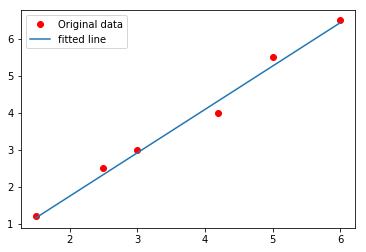

In [48]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(ranX2, ranY, label='fitted line')
plt.legend()
plt.show()

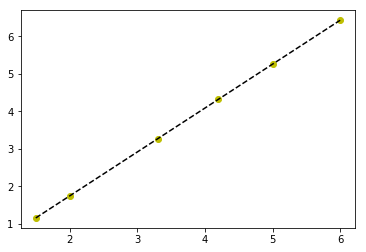

0.275684


In [51]:
import numpy as np
import tensorflow as tf
npx=np.asarray(ranX2)
npy=np.asarray(ranY)

GraphFit=np.polyfit(npx,npy,1)
fitFunc=np.poly1d(GraphFit)

plt.plot(npx,npy,'yo',npx,fitFunc(npx),'--k')

plt.show()

with tf.name_scope("Root_mean_square_error"):
    rmse=tf.sqrt(tf.reduce_mean(tf.squared_difference(ranX,ranY)))

with tf.Session() as sess:
    print(sess.run(rmse))